# GDP Data EDA

In [1]:
import json
import pandas as pd
import ast

In [2]:
groundtruth_data = pd.read_csv("groundtruthdata.csv")

# Get All Rows Categories List
categorical_items = []
counter = 0

# For each row in the set, add the category to the list
for img in groundtruth_data[['bounding_boxes']].values:
    correct_list = ast.literal_eval(img[0])
    #print(res[0]['raw_category'])
    categorical_items.append(correct_list[0]['raw_category'])
    
    # Print as it goes through (3000 for more accurate)
    if counter % 20000 == 0:
        print(correct_list[0]['raw_category'])
    
    #break
    counter += 1

# Add New Row
groundtruth_data['category'] = pd.Series(categorical_items)

# Print Head of Data
print(groundtruth_data.head(5))

# Print all unqiue values
#print("Unique Categories")
#print(groundtruth_data.category.unique())

# Print all unqiue country codes
#print("Unique Country Codes")
#print(groundtruth_data.country_code.unique())

Fountain
Aquaculture
School_Higher Education
Race Track
Nuclear Powerplant
Tower Water
Wind Farm
Baseball Field
Multi-Unit Residential
Public Transport_Train Station
Gas Station
Electric Substation
Shopping Mall
Swimming Pool
Cemetery/Burial Site
Lighthouse
Single-Unit Residential
Road Bridge
Place of Worship_Church
Solar Farm
Crop Field Corn
Waste Disposal
Factory/Powerplant
Oil/Gas Facility
Park
Construction Site
Crop Field Barley
   Unnamed: 0            img_filename  \
0           0  fountain_148_0_rgb.tif   
1           1   fountain_32_0_rgb.tif   
2           2  fountain_141_0_rgb.tif   
3           3  fountain_141_1_rgb.tif   
4           4  fountain_146_0_rgb.tif   

                                      bounding_boxes       gsd  img_width  \
0  [{'raw_category': 'Fountain', 'category': 'fou...  0.483650       1040   
1  [{'raw_category': 'Fountain', 'category': 'fou...  0.340832       1471   
2  [{'raw_category': 'Fountain', 'category': 'fou...  0.357868       1401   
3  [{'ra

In [3]:
# Get GDP Data
gdp_data = pd.read_csv("gdp_csv.csv")
#print(gdp_data.head(5))

# Get Only Most Recent GDP
gdp_data_2 = gdp_data[(gdp_data['Year'] == 2016)]
#print(gdp_data_2.head(5))

print(gdp_data_2.columns)
new_names = []
for item in gdp_data_2:
    testing = item.lower()
    final = testing.replace(" ", "_")
    new_names.append(final)

print(new_names)
new_names = ['gdp_country_name', 'country_code', 'gdp_year', 'gdp_value']
gdp_data_2.columns = new_names
print(gdp_data_2.head(5))

gdp_countries = gdp_data_2.country_code.unique()

#for country in gdp_countries:
#    if country in all_country_keys:
#        print(country)

Index(['Country Name', 'Country Code', 'Year', 'Value'], dtype='object')
['country_name', 'country_code', 'year', 'value']
                   gdp_country_name country_code  gdp_year     gdp_value
48                       Arab World          ARB      2016  2.504703e+12
105          Caribbean small states          CSS      2016  6.670736e+10
132  Central Europe and the Baltics          CEB      2016  1.312158e+12
189      Early-demographic dividend          EAR      2016  1.040199e+13
246             East Asia & Pacific          EAS      2016  2.248043e+13


In [4]:
# Select only columns needed for EDA
gtdf = groundtruth_data[['country_code', 'category']]

result = pd.merge(gdp_data_2, gtdf, on=["country_code", "country_code"])
result.head()

# Select Only Desired Categories
higher_education = gtdf[gtdf['category'] == 'School_Higher Education']

In [5]:
# Count insitutions in each country and display a double check
higher_education2 = higher_education.groupby(['country_code']).count().reset_index()
higher_education2.head()

,country_code,category
0,AFG,16
1,AGO,27
2,ALB,16
3,ARE,69
4,ARG,304


In [6]:
# Merge with GDP Data and show success
country_df_with_higher_education = gdp_data_2.merge(higher_education2, on='country_code', how='inner')
country_df_with_higher_education = country_df_with_higher_education.rename(columns={'category':'Higher Education'})
country_df_with_higher_education

,gdp_country_name,country_code,gdp_year,gdp_value,Higher Education
0,Afghanistan,AFG,2016,1.946902e+10,16
1,Albania,ALB,2016,1.186387e+10,16
2,Algeria,DZA,2016,1.590491e+11,29
3,Angola,AGO,2016,9.533511e+10,27
4,Antigua and Barbuda,ATG,2016,1.460145e+09,3
...,...,...,...,...,...
111,United Kingdom,GBR,2016,2.647899e+12,373
112,United States,USA,2016,1.862448e+13,2631
113,Vietnam,VNM,2016,2.052762e+11,9
114,West Bank and Gaza,PSE,2016,1.339710e+10,10


In [7]:
# Do some of that correlation stuff
country_df_with_higher_education.corr()

/var/folders/6d/zr__c77909g99nxg4g22b5zh0000gn/T/ipykernel_76830/1491418208.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  country_df_with_higher_education.corr()


,gdp_year,gdp_value,Higher Education
gdp_year,NaN,NaN,NaN
gdp_value,NaN,1.000000,0.938998
Higher Education,NaN,0.938998,1.000000


<AxesSubplot: xlabel='Higher Education'>

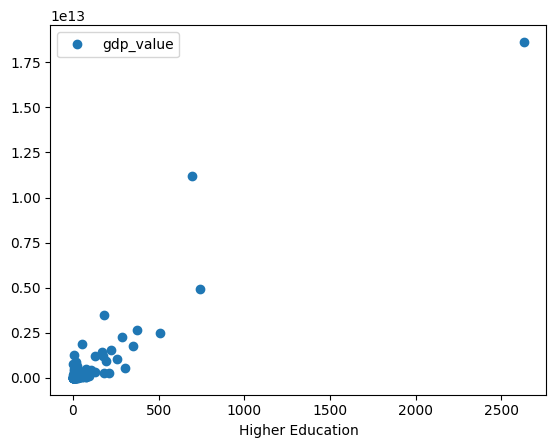

In [8]:
# Plot Data
country_df_with_higher_education.plot(x='Higher Education', y='gdp_value', style='o')

In [9]:
# Show the countries ordered by GDP with number of institutions
temp = country_df_with_higher_education.sort_values(by='gdp_value', ascending=False)
temp.head(30)

,gdp_country_name,country_code,gdp_year,gdp_value,Higher Education
112,United States,USA,2016,1.862448e+13,2631
29,China,CHN,2016,1.119915e+13,693
66,Japan,JPN,2016,4.940159e+12,740
48,Germany,DEU,2016,3.477796e+12,182
111,United Kingdom,GBR,2016,2.647899e+12,373
46,France,FRA,2016,2.465454e+12,509
59,India,IND,2016,2.263792e+12,286
64,Italy,ITA,2016,1.858913e+12,52
21,Brazil,BRA,2016,1.796187e+12,349
27,Canada,CAN,2016,1.529760e+12,225
